In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
#Extracting dataset

!tar -xzf 'drive/My Drive/Machine_Learning-prj/vietnamese_address/data.tar.gz'

Archive:  drive/My Drive/Machine_Learning-prj/vietnamese_address/data.tar.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of drive/My Drive/Machine_Learning-prj/vietnamese_address/data.tar.gz or
        drive/My Drive/Machine_Learning-prj/vietnamese_address/data.tar.gz.zip, and cannot find drive/My Drive/Machine_Learning-prj/vietnamese_address/data.tar.gz.ZIP, period.


In [3]:
ls

drive/  images/  sample_data/  transcription.pk


In [0]:
import pickle

with open('transcription.pk', 'rb') as f:
    scripts = pickle.load(f)

In [2]:
list(scripts[10].values())[0]

'bốn người thợ liệm - vốn cũng là công nhân đào vàng - đang tiếp tục công'

In [0]:
files_name = []
labels = []


for script in scripts:
    files_name.append(list(script.keys())[0])
    labels.append(list(script.values())[0])

In [4]:
len(files_name), len(labels)

(7296, 7296)

In [0]:
#Reading and resize data to 32*128

from matplotlib import pyplot as PLT
import cv2

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Hải


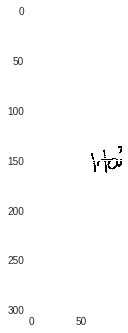

In [6]:
img = cv2.imread(files_name[6598], 0)
img = 255 - img
# _, img = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)
PLT.imshow(img)
print(img)
print(labels[6598])

136 163
60 90


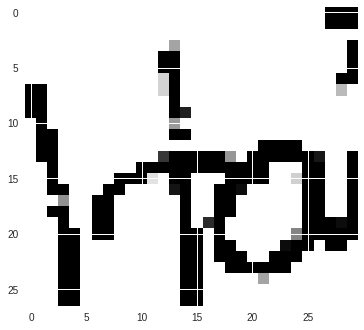

In [7]:
import numpy as np

y_min = np.min(np.where(img == 255)[0])
y_max = np.max(np.where(img == 255)[0])
print(y_min, y_max)
x_min = np.min(np.where(img == 255)[1])
x_max = np.max(np.where(img == 255)[1])
print(x_min, x_max)
img = img[y_min:y_max, x_min:x_max]
PLT.imshow(img)

In [8]:
from tqdm import tqdm

images = []
error_index = []
for i, file_name in tqdm(enumerate(files_name)):
    img = cv2.imread(file_name, 0)
    img = 255 - img
    y_min = np.min(np.where(img > 127)[0])
    y_max = np.max(np.where(img > 127)[0])
    x_min = np.min(np.where(img > 127)[1])
    x_max = np.max(np.where(img > 127)[1])
    img = img[y_min:y_max, x_min:x_max]
    try:
        img = cv2.resize(img, (int(img.shape[1]*64/img.shape[0]), 64))
        images.append(img)
    except:
        print("ERROR FOUND AT: " + str(i))
        error_index.append(i)

7296it [02:01, 60.20it/s]


In [9]:
len(error_index), len(labels)

(0, 7296)

In [0]:
# count = 0
# for e in error_index:
#     del labels[e-count]
#     count += 1

In [29]:
import numpy as np
a = max([np.shape(images[i])[1] for i in range(len(images))])
print(a)

1595


In [0]:
len_images = [img.shape[1] for img in images]

In [0]:
too_length_index = np.where(np.array(len_images)>1600)[0]

In [0]:
count = 0
for l in too_length_index:
    del images[l-count]
    del labels[l-count]
    count += 1

In [28]:
len(images), len(labels)

(7260, 7260)

vừa ra trường từ phố núi xuống thành phố tìm việc làm. Lơ ngơ thế nào, chàng


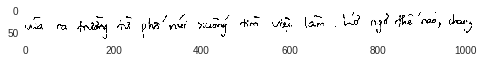

In [31]:
x = 7000
PLT.imshow(images[x])
print(labels[x])

In [0]:
# images_padded = []
# for img in images:
#     img = cv2.copyMakeBorder(img, 0, 0, 0, 2862 - img.shape[1] ,cv2.BORDER_CONSTANT,value=1)
#     images_padded.append(img)

In [0]:
import pickle

with open('drive/My Drive/Machine_Learning-prj/vietnamese_address/images_64_1595.pkl', 'wb') as f:
    pickle.dump(images, f)
    
with open('drive/My Drive/Machine_Learning-prj/vietnamese_address/scripts_64_1595.pkl', 'wb') as f:
    pickle.dump(labels, f)

In [0]:
#Extracting dataset

!unzip 'drive/My Drive/Machine_Learning-prj/vietnamese_address/vietnamese'

In [6]:
ls

0916_Data Samples 2/  drive/  sample_data/


In [0]:
import json

with open('0916_Data Samples 2/labels.json', 'r') as f:
    scripts = f.read()

In [0]:
json_data = json.loads(scripts)

In [0]:
keys = list(json_data.keys())

In [0]:
files_name = []
labels = []


for i, k in enumerate(keys):
    files_name.append('0916_Data Samples 2/'+k)
    labels.append(json_data[keys[i]])

In [76]:
len(files_name), len(labels)

(1823, 1818)

In [0]:
#Reading and resize data to 32*128

from matplotlib import pyplot as PLT
import cv2

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
180 Đường số 3, Phường 9, Quận Gò Vấp, TP Hồ Chí Minh


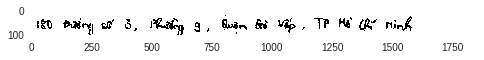

In [58]:
img = cv2.imread(files_name[598], 0)
_, img = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)
img = 255 - img
PLT.imshow(img)
print(img)
print(labels[598])

13 102
24 1581


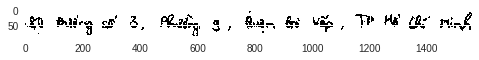

In [59]:
import numpy as np

y_min = np.min(np.where(img == 255)[0])
y_max = np.max(np.where(img == 255)[0])
print(y_min, y_max)
x_min = np.min(np.where(img == 255)[1])
x_max = np.max(np.where(img == 255)[1])
print(x_min, x_max)
img = img[y_min:y_max, x_min:x_max]
PLT.imshow(img)

In [63]:
from tqdm import tqdm

images = []
error_index = []
for i, file_name in tqdm(enumerate(files_name)):
    img = cv2.imread(files_name[i], 0)
    _, img = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)
    img = 255 - img
    
    y_min = np.min(np.where(img > 127)[0])
    y_max = np.max(np.where(img > 127)[0])
    x_min = np.min(np.where(img > 127)[1])
    x_max = np.max(np.where(img > 127)[1])
    img = img[y_min:y_max, x_min:x_max]
    try:
        img = cv2.resize(img, (int(img.shape[1]*64/img.shape[0]), 64))
        images.append(img)
    except:
        print("ERROR FOUND AT: " + str(i))
        error_index.append(i)

1823it [00:17, 104.06it/s]


In [64]:
import numpy as np
a = max([np.shape(images[i])[1] for i in range(len(images))])
print(a)

1878


Số 171A, Đường Điện Biên, Phường Lê Lợi, Thành phố Hưng yên, Hưng Yên


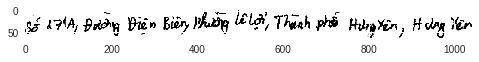

In [69]:
x = 1822
PLT.imshow(images[x])
print(labels[x])

In [0]:
len_images = [img.shape[1] for img in images]

In [0]:
too_length_index = np.where(np.array(len_images)>1595)[0]

In [0]:
count = 0
for l in too_length_index:
    del images[l-count]
    del labels[l-count]
    count += 1

In [0]:
import pickle

with open('drive/My Drive/Machine_Learning-prj/vietnamese_address/images_address.pkl', 'wb') as f:
    pickle.dump(images, f)
    
with open('drive/My Drive/Machine_Learning-prj/vietnamese_address/scripts_address.pkl', 'wb') as f:
    pickle.dump(labels, f)